In [1]:
!nvidia-smi

Sat Aug 31 09:15:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics
from IPython import display
display.clear_output()

In [4]:
!yolo checks


Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.0+cu121>=1.8.0
torchvision         ✅ 0.19.0+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.5>=2.0.0


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

# Example of loading a model and displaying an image
# model = YOLO('yolov8n.pt')
# display(Image(filename='path_to_image.jpg'))


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/YoloV8

/content/drive/MyDrive/YoloV8


In [8]:
!ls

'army worm.v1i.yolov8'	 data.yaml   runs   Yolov8.ipynb   yolov8n.pt


In [ ]:
%cd /content/drive/MyDrive/YoloV8
!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/YoloV8
100% 6.25M/6.25M [00:00<00:00, 210MB/s]
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

In [9]:
!ls runs/detect/train

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1724678591.67fc304ad335.3144.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch330.jpg	weights
P_curve.png					    train_batch331.jpg
PR_curve.png					    train_batch332.jpg


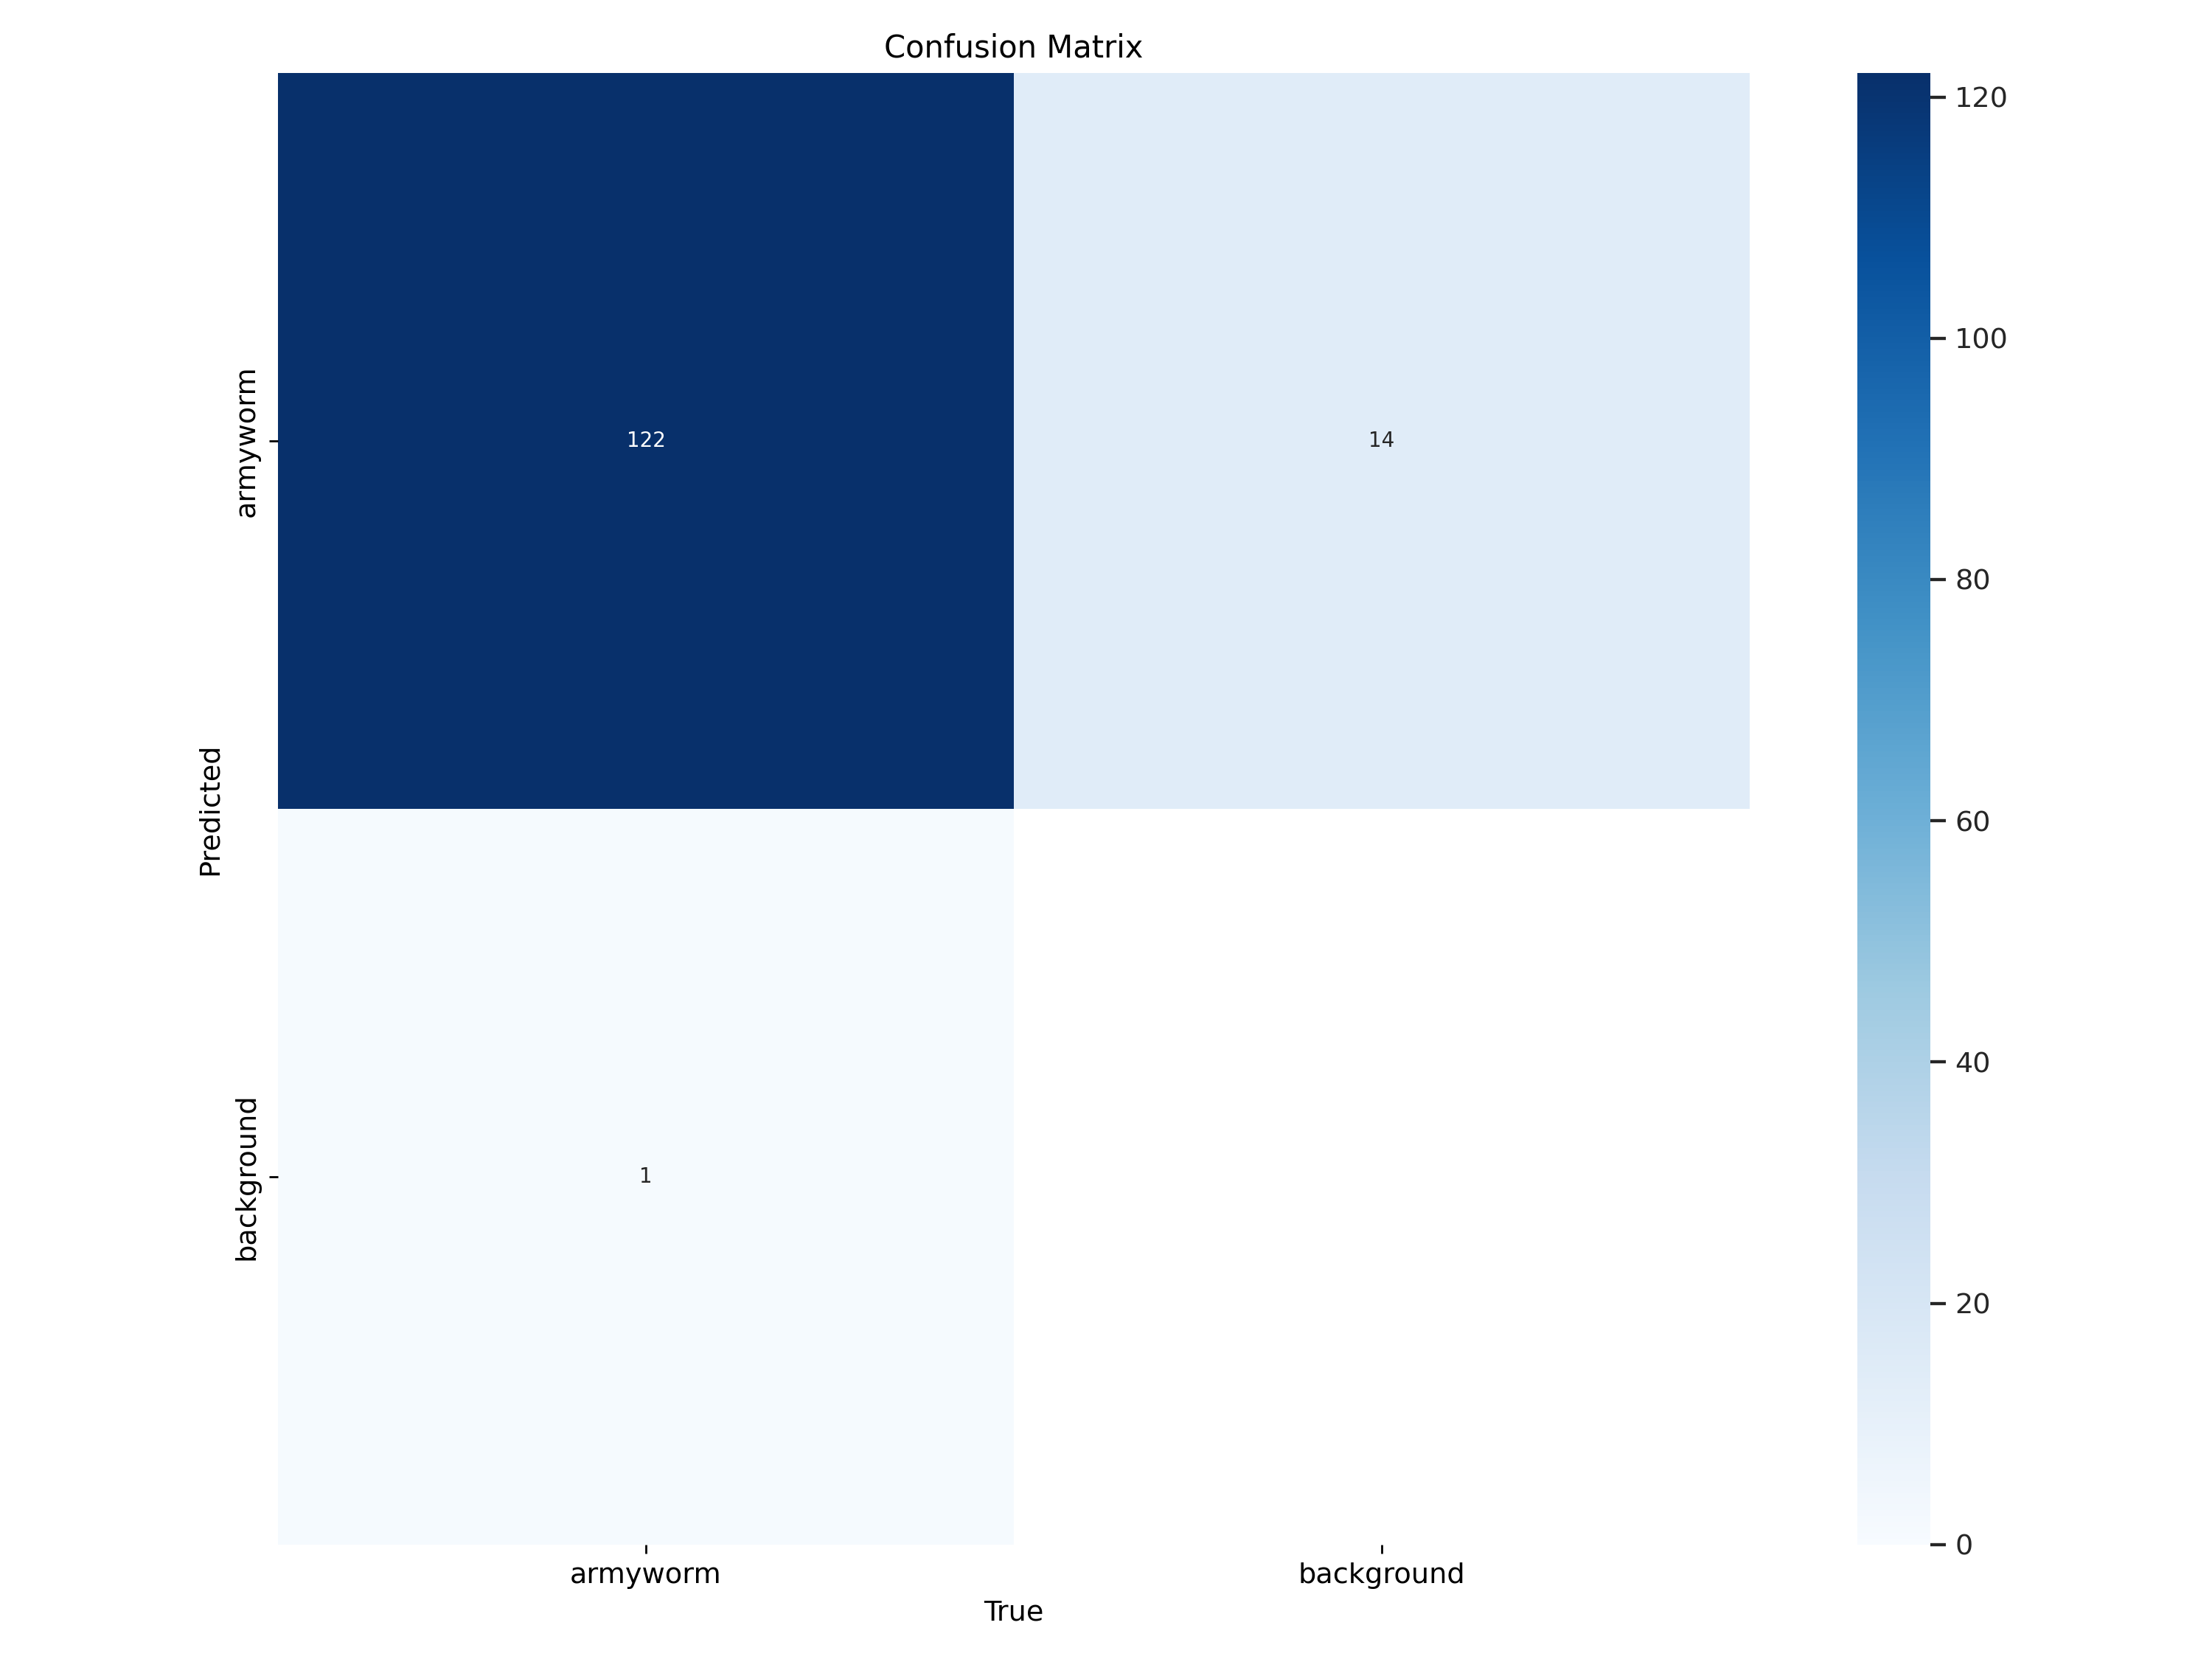

In [10]:
Image (filename='runs/detect/train/confusion_matrix.png', width=600)

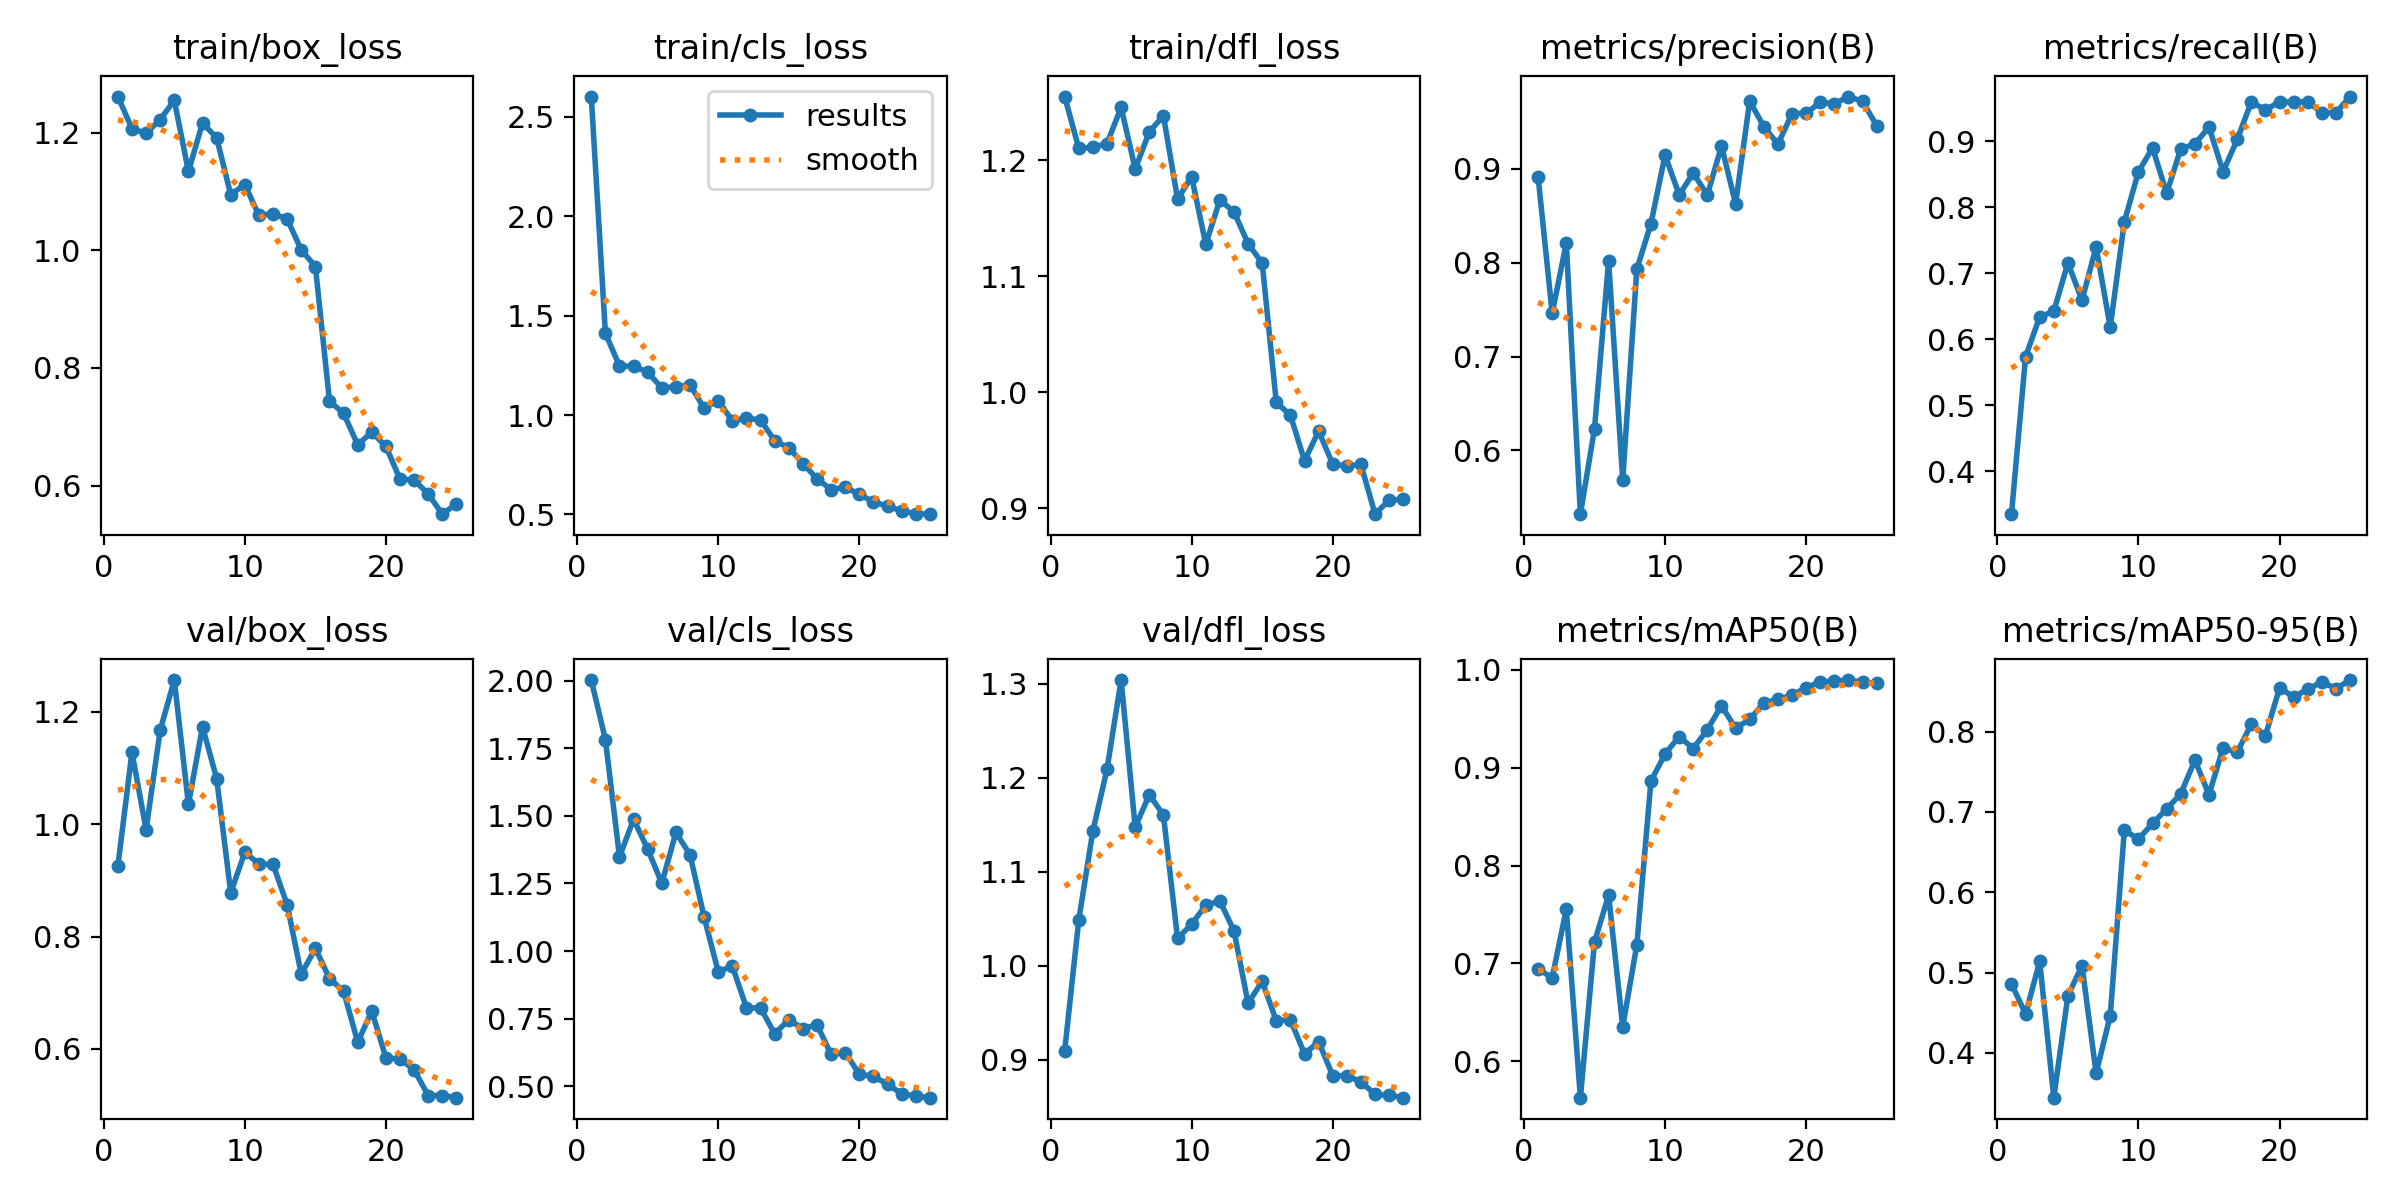

In [11]:
Image(filename='runs/detect/train/results.png', width=600)

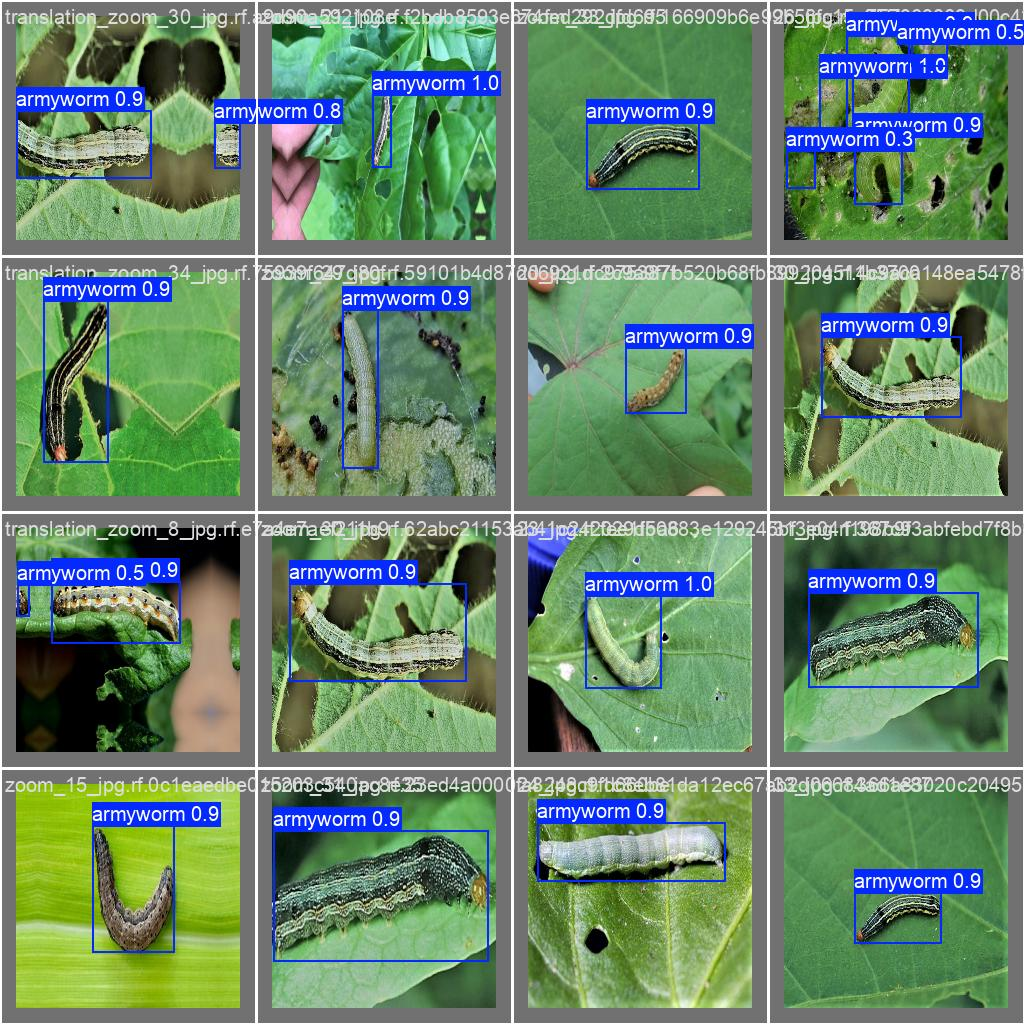

In [12]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 18.7MB/s]
val: Scanning /content/drive/MyDrive/YoloV8/army worm.v1i.yolov8/valid/labels.cache... 99 images, 1 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:17<00:00,  2.47s/it]
                   all         99        123       0.94      0.967      0.986      0.862
Speed: 0.0ms preprocess, 4.9ms inference, 0.0ms loss, 13.8ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [10]:
# prompt: test random picture to check model

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='/content/drive/MyDrive/YoloV8/Close-up-veins-leaf.webp'


Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/YoloV8/Close-up-veins-leaf.webp: 128x224 (no detections), 93.1ms
Speed: 9.6ms preprocess, 93.1ms inference, 69.7ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='/content/drive/MyDrive/YoloV8/faw-news-large.jpg'

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/YoloV8/faw-news-large.jpg: 128x224 1 armyworm, 77.9ms
Speed: 1.2ms preprocess, 77.9ms inference, 1091.2ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='/content/drive/MyDrive/YoloV8/images.jpeg'

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/YoloV8/images.jpeg: 192x224 4 armyworms, 31.7ms
Speed: 1.0ms preprocess, 31.7ms inference, 562.1ms postprocess per image at shape (1, 3, 192, 224)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
